# Imports

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [2]:
def data(content):
    return "/app/data/" + content

# Variáveis de Configuração

In [5]:
# Informe o diretório no GDrive onde estão os arquivos XLSX que contêm os datasets e catalog:

dataset_path = 'Dados DNC - Clientes, Ordens e Produtos_2.xlsx'
catalog_path = 'Data Catolog - Bases DNC_2.xlsx'

# Informe o nome das planilhas do dataset e catalog:

datasets = {
  'clientes': 'Reporting - Dados Perfil de Cli',
  'ordens': 'Reporting - Dados Ordens - Reco',
  'produtos': 'Reporting - Dados Produtos - Re'
}

catalog = {
    'clientes': 'Perfil de Clients',
    'ordens': 'Ordens ',
    'produtos': 'Produtos',
}

In [6]:
# Informe os tipos de dados e seus equivalentes no Python para realizar a conversão automática dos tipos de dados de cada campo

datatypes = {
  'STRING': 'object',
  'NUMERIC': 'float64',
  'INTEGER': 'int64',
  'BYTES': 'object',
  'DATE': 'datetime64[ns]',
}

month = {
  'jan': 'jan',
  'fev': 'feb',
  'mar': 'mar',
  'abr': 'apr',
  'mai': 'may',
  'jun': 'jun',
  'jul': 'jul',
  'ago': 'aug',
  'set': 'sep',
  'out': 'oct',
  'nov': 'nov',
  'dez': 'dec',
}

# Executar a importação

In [8]:
# realiza a importação dos datasets

df_dataset = pd.read_excel(data(dataset_path), sheet_name=None)
dfs = {}
for index, key in enumerate(datasets):
  dfs[key] = df_dataset.get(datasets[key])

In [9]:
df_catalog = pd.read_excel(data(catalog_path), sheet_name=None)
catalogs = {}
for index, key in enumerate(catalog):
  catalogs[key] = df_catalog.get(catalog[key])

# Data Understanding

In [10]:
# retira espaços dos nomes das features

def convertCatalog(plan):
  catalogs[plan].columns = catalogs[plan].columns.str.replace(' ', '')
  catalogs[plan].columns
  return catalogs[plan][['Campo', 'Tipo']]

In [11]:
convertCatalog('ordens')

,Campo,Tipo
0,Date,DATE
1,AccountID,BYTES
2,ProductCategory,STRING
3,Symbol,STRING
4,Group,STRING
5,Industry,STRING
6,Sector,STRING
7,BuySell,STRING
8,TotalExecutedQuantity,NUMERIC
9,TotalExecutedVolume,NUMERIC


In [12]:
convertCatalog('clientes')

,Campo,Tipo
0,AccountID,STRING
1,Function,STRING
2,MonthlyIncome,NUMERIC
3,NetWorth,NUMERIC
4,TotalInvested,NUMERIC
5,SubscriptionPlan,STRING
6,InvestmentExperience,STRING
7,RiskTolerance,STRING
8,InvestmentObjective,STRING
9,AvenueRiskProfile,STRING


In [13]:
convertCatalog('produtos')

,Campo,Tipo
0,Symbol,STRING
1,Product,STRING
2,Product_N1,STRING
3,Product_N2,STRING
4,Product_N3,STRING
5,Sector,STRING
6,Industry,STRING
7,Group,STRING


In [14]:
dfs['ordens'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60423 entries, 0 to 60422
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AccountID              60423 non-null  object 
 1   BuySell                60423 non-null  object 
 2   Date                   60423 non-null  object 
 3   Group                  42644 non-null  object 
 4   Industry               60423 non-null  object 
 5   Sector                 60423 non-null  object 
 6   Symbol                 60423 non-null  object 
 7   ProductCategory        60423 non-null  object 
 8   TotalExecutedQuantity  60423 non-null  float64
 9   TotalExecutedVolume    60423 non-null  float64
 10  PercCustody            60423 non-null  float64
dtypes: float64(3), object(8)
memory usage: 5.1+ MB


In [15]:
dfs['produtos'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Group       20459 non-null  object
 1   Industry    25043 non-null  object
 2   Product     34431 non-null  object
 3   Product_N1  35064 non-null  object
 4   Product_N2  35064 non-null  object
 5   Product_N3  35064 non-null  object
 6   Sector      25043 non-null  object
 7   Symbol      35063 non-null  object
dtypes: object(8)
memory usage: 2.1+ MB


In [16]:
dfs['clientes'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30226 entries, 0 to 30225
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   AccountID             30226 non-null  object
 1   Function              30226 non-null  object
 2   MonthlyIncome         30226 non-null  int64 
 3   NetWorth              30226 non-null  int64 
 4   TotalInvested         30226 non-null  int64 
 5   SubscriptionPlan      30226 non-null  object
 6   InvestmentExperience  30226 non-null  object
 7   RiskTolerance         30226 non-null  object
 8   InvestmentObjective   30226 non-null  object
 9   AvenueRiskProfile     30226 non-null  object
 10  TargetAudience        30226 non-null  object
 11  Age                   30226 non-null  int64 
 12  MaritalStatus         30226 non-null  object
 13  PersonMailingState    30226 non-null  object
 14  YearBirthDate         30226 non-null  int64 
 15  Geracao               30226 non-null

# Data Preparation

In [17]:
dfs['clientes']['MonthlyIncome'] = dfs['clientes']['MonthlyIncome'].astype(float)
dfs['clientes']['NetWorth'] = dfs['clientes']['NetWorth'].astype(float)
dfs['clientes']['TotalInvested'] = dfs['clientes']['TotalInvested'].astype(float)
dfs['clientes'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30226 entries, 0 to 30225
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AccountID             30226 non-null  object 
 1   Function              30226 non-null  object 
 2   MonthlyIncome         30226 non-null  float64
 3   NetWorth              30226 non-null  float64
 4   TotalInvested         30226 non-null  float64
 5   SubscriptionPlan      30226 non-null  object 
 6   InvestmentExperience  30226 non-null  object 
 7   RiskTolerance         30226 non-null  object 
 8   InvestmentObjective   30226 non-null  object 
 9   AvenueRiskProfile     30226 non-null  object 
 10  TargetAudience        30226 non-null  object 
 11  Age                   30226 non-null  int64  
 12  MaritalStatus         30226 non-null  object 
 13  PersonMailingState    30226 non-null  object 
 14  YearBirthDate         30226 non-null  int64  
 15  Geracao            

## Mudança no formato da data

In [18]:
exportDataAntes = dfs['ordens']['Date']
dfs['ordens']['Date'].head()

0    22 de jun. de 2022
1    26 de jul. de 2022
2    28 de jul. de 2022
3    20 de jan. de 2022
4    13 de jun. de 2022
Name: Date, dtype: object

In [20]:
def ajusteData(x):
  for i in range(len(x)):
    if x[i][1] == ' ':
      x[i] = '0'+ x[i]
    if x[i][6:9] == 'abr':
      x[i] = x[i].replace('abr', 'apr')
    elif x[i][6:9] == 'fev':
      x[i] = x[i].replace('fev', 'feb')
    elif x[i][6:9] == 'mai':
      x[i] = x[i].replace('mai', 'may')
    elif x[i][6:9] == 'ago':
      x[i] = x[i].replace('ago', 'aug')
    elif x[i][6:9] == 'set':
      x[i] = x[i].replace('set', 'sep')
    elif x[i][6:9] == 'out':
      x[i] = x[i].replace('out', 'oct')
    elif x[i][6:9] == 'dez':
      x[i] = x[i].replace('dez', 'dec')
  return(x)

In [21]:
ajusteData(dfs['ordens']['Date']).head(10)

/tmp/ipykernel_6949/1288035112.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = '0'+ x[i]
/tmp/ipykernel_6949/1288035112.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = x[i].replace('abr', 'apr')
/tmp/ipykernel_6949/1288035112.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = x[i].replace('set', 'sep')
/tmp/ipykernel_6949/1288035112.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

0    22 de jun. de 2022
1    26 de jul. de 2022
2    28 de jul. de 2022
3    20 de jan. de 2022
4    13 de jun. de 2022
5    05 de apr. de 2022
6    20 de jan. de 2022
7    05 de apr. de 2022
8    12 de sep. de 2022
9    16 de feb. de 2022
Name: Date, dtype: object

In [22]:
dfs['ordens']['Date'].head()

0    22 de jun. de 2022
1    26 de jul. de 2022
2    28 de jul. de 2022
3    20 de jan. de 2022
4    13 de jun. de 2022
Name: Date, dtype: object

In [23]:
dfs['ordens']['Date'] = pd.to_datetime(dfs['ordens']['Date'], format = '%d de %b. de %Y')
dfs['ordens'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60423 entries, 0 to 60422
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   AccountID              60423 non-null  object        
 1   BuySell                60423 non-null  object        
 2   Date                   60423 non-null  datetime64[ns]
 3   Group                  42644 non-null  object        
 4   Industry               60423 non-null  object        
 5   Sector                 60423 non-null  object        
 6   Symbol                 60423 non-null  object        
 7   ProductCategory        60423 non-null  object        
 8   TotalExecutedQuantity  60423 non-null  float64       
 9   TotalExecutedVolume    60423 non-null  float64       
 10  PercCustody            60423 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 5.1+ MB


In [24]:
exportDataAtual = dfs['ordens']['Date']
dfs['ordens']['Date'].head()

0   2022-06-22
1   2022-07-26
2   2022-07-28
3   2022-01-20
4   2022-06-13
Name: Date, dtype: datetime64[ns]

In [25]:
dfs['produtos'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Group       20459 non-null  object
 1   Industry    25043 non-null  object
 2   Product     34431 non-null  object
 3   Product_N1  35064 non-null  object
 4   Product_N2  35064 non-null  object
 5   Product_N3  35064 non-null  object
 6   Sector      25043 non-null  object
 7   Symbol      35063 non-null  object
dtypes: object(8)
memory usage: 2.1+ MB


## Exclusão de features

Product_N1 e Product_N2 são valores constantes

A coluna Group tem muitos valores faltantes

In [26]:
df_produtos = dfs['produtos'].copy()
df_ordens = dfs['ordens'].copy()
df_clientes = dfs['clientes'].copy()

In [27]:
df_produtos.drop(['Product_N1', 'Product_N2', 'Group'], axis = 1, inplace = True)
df_produtos.head()

,Industry,Product,Product_N3,Sector,Symbol
0,ElectricUtilities,Zhaoheng Hydropower Ltd,Stocks,Utilities,ZHYLF
1,WaterUtilities,York Water Co.,Stocks,Utilities,YORW
2,ElectricUtilities,XR Energy Inc,Stocks,Utilities,XREG
3,GasDistributors,Xcelplus International Inc,Stocks,Utilities,XLPI
4,GasDistributors,Xcelplus International Inc,Stocks,Utilities,XLPID


In [28]:
df_produtos = df_produtos.dropna()

In [29]:
df_clientes.drop(['Age', 'Function', 'TargetAudience', 'YearBirthDate'], axis = 1, inplace = True)
df_clientes.head()

,AccountID,MonthlyIncome,NetWorth,TotalInvested,SubscriptionPlan,InvestmentExperience,RiskTolerance,InvestmentObjective,AvenueRiskProfile,MaritalStatus,PersonMailingState,Geracao
0,t+aOWun52ukqY4IbvLnENg==,25000.0,3000000.0,1000000.0,Default,GOOD,MEDIUM,CAPITAL_PRESERVATION,Perfil Conservador,Married,BA,Baby Bloomers
1,mMgYLYV4o6EN+N+o2M7Akw==,20000.0,2500000.0,40000.0,Zero,LIMITED,LOW,CAPITAL_PRESERVATION,Perfil Conservador,Widower,SP,Baby Bloomers
2,38TMFewG73EP8cLYrF/ASA==,25000.0,5000000.0,3000000.0,Default,GOOD,HIGH,CAPITAL_PRESERVATION,Perfil Conservador,Single,RJ,Baby Bloomers
3,HyPpb8yaxlsh46cVx7xI7A==,35099.0,20000.0,0.0,Default,LIMITED,MEDIUM,INCOME,Perfil Conservador,Divorced,MG,Baby Bloomers
4,RR5HU2/9NRtb79lGp2EpQQ==,7500.0,990000.0,25000.0,Default,GOOD,LOW,INCOME,Perfil Conservador,Married,RJ,Baby Bloomers


In [30]:
df_ordens.drop(['Group', 'Industry', 'Sector'], axis = 1, inplace = True)
df_ordens.head()

,AccountID,BuySell,Date,Symbol,ProductCategory,TotalExecutedQuantity,TotalExecutedVolume,PercCustody
0,1uCUFbHCIkh4gBUBLW0Chg==,B,2022-06-22,EGY,Stocks,1.0000,7.85,0.013131
1,XYuN07JmaixJSrM91bdCmg==,S,2022-07-26,TFLO,ETF's,100.0000,5041.00,0.249737
2,fz8HbCtcaZEMC2qvHws8OQ==,B,2022-07-28,XYLD,ETF's,1.0000,43.76,0.023596
3,7GALBnOZ54+zM3Zw6tlIWA==,B,2022-01-20,GOOD,Stocks,3.0000,71.64,0.159409
4,cf3UhrDfIXgoKr9vxN3tCA==,B,2022-06-13,AMZN,Stocks,0.0964,10.00,0.039268


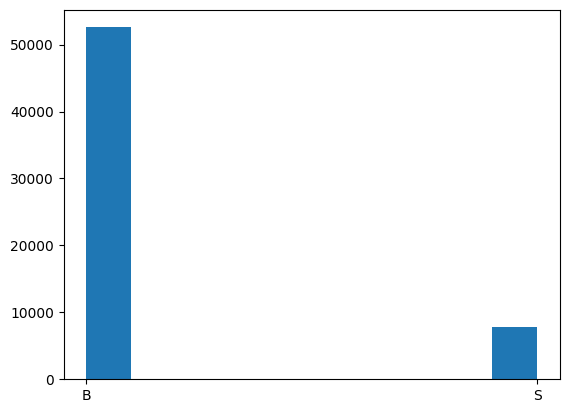

In [31]:
# Numero de compras e vendas do dataset
plt.hist(df_ordens['BuySell']);

In [32]:
# Filtragem dos dados de compra apenas

df_ordens = df_ordens.query('BuySell == "B"')

In [33]:
df_ordens.head()

,AccountID,BuySell,Date,Symbol,ProductCategory,TotalExecutedQuantity,TotalExecutedVolume,PercCustody
0,1uCUFbHCIkh4gBUBLW0Chg==,B,2022-06-22,EGY,Stocks,1.0000,7.85,0.013131
2,fz8HbCtcaZEMC2qvHws8OQ==,B,2022-07-28,XYLD,ETF's,1.0000,43.76,0.023596
3,7GALBnOZ54+zM3Zw6tlIWA==,B,2022-01-20,GOOD,Stocks,3.0000,71.64,0.159409
4,cf3UhrDfIXgoKr9vxN3tCA==,B,2022-06-13,AMZN,Stocks,0.0964,10.00,0.039268
5,jzfOWrgn2fNHprnBRuCTGw==,B,2022-04-05,SDIV,ETF's,10.0000,116.50,0.042102


## União dos Datasets

In [34]:
# União dos datasets
df = df_ordens.merge(df_clientes, on = 'AccountID', how = 'left')
df = df.merge(df_produtos.reset_index(drop = True), how = 'left', on = 'Symbol')
df

,AccountID,BuySell,Date,Symbol,ProductCategory,TotalExecutedQuantity,TotalExecutedVolume,PercCustody,MonthlyIncome,NetWorth,...,RiskTolerance,InvestmentObjective,AvenueRiskProfile,MaritalStatus,PersonMailingState,Geracao,Industry,Product,Product_N3,Sector
0,1uCUFbHCIkh4gBUBLW0Chg==,B,2022-06-22,EGY,Stocks,1.0000,7.85,0.013131,12500.0,21600.0,...,MEDIUM,GROWTH,Perfil Conservador,Single,MG,Geração X,OilAndGasProduction,"VAALCO Energy, Inc.",Stocks,EnergyMinerals
1,fz8HbCtcaZEMC2qvHws8OQ==,B,2022-07-28,XYLD,ETF's,1.0000,43.76,0.023596,50000.0,3800000.0,...,MEDIUM,GROWTH,Perfil Moderado,Married,BA,Geração X,InvestmentTrustsOrMutualFunds,Global X S&P 500 Covered Call ETF,ETF's,Miscellaneous
2,7GALBnOZ54+zM3Zw6tlIWA==,B,2022-01-20,GOOD,Stocks,3.0000,71.64,0.159409,10200.0,53700.0,...,HIGH,GROWTH,Perfil Conservador,Single,SP,Geração Y,RealEstateInvestmentTrusts,Gladstone Commercial Corp,Stocks,Finance
3,cf3UhrDfIXgoKr9vxN3tCA==,B,2022-06-13,AMZN,Stocks,0.0964,10.00,0.039268,6000.0,249580.0,...,MEDIUM,GROWTH,Perfil Moderado,Single,SP,Geração Y,InternetRetail,Amazon.com Inc.,Stocks,RetailTrade
4,jzfOWrgn2fNHprnBRuCTGw==,B,2022-04-05,SDIV,ETF's,10.0000,116.50,0.042102,15000.0,500000.0,...,MEDIUM,GROWTH,Perfil Moderado,Married,SP,Geração X,InvestmentTrustsOrMutualFunds,Global X SuperDividend ETF,ETF's,Miscellaneous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52586,DFFcBc492Y8m9wIkURAz4g==,B,2022-01-03,BRK.B,Stocks,0.0266,8.00,0.219787,21792.0,10000.0,...,HIGH,CAPITAL_PRESERVATION,Perfil Conservador,Single,GO,Geração Y,MultiLineInsurance,Berkshire Hathaway Inc. Hld B,Stocks,Finance
52587,C+Ueni/6ORpx6t92iozaRQ==,B,2022-01-03,IVV,ETF's,1.0000,477.98,0.992586,952452.0,430000.0,...,MEDIUM,GROWTH,Perfil Moderado,Single,SP,Geração Y,InvestmentTrustsOrMutualFunds,Core S&P 500 iShares ETF,ETF's,Miscellaneous
52588,/S6hJ9xcj7J0TeE7c+XpUQ==,B,2022-01-03,NTSX,ETF's,1.0000,44.43,0.630302,6000.0,20000.0,...,HIGH,GROWTH,Perfil Conservador,Single,RS,Geração Z,InvestmentTrustsOrMutualFunds,WisdomTree Trust - WisdomTree 90 60 U S Balanc...,ETF's,Miscellaneous
52589,ZnLSHwARmjpxecMAkFeFWQ==,B,2022-01-03,GOGL,Stocks,2.1605,21.00,0.974350,1400.0,60000.0,...,MEDIUM,CAPITAL_PRESERVATION,Perfil Moderado,Married,CE,Geração Z,MarineShipping,Golden Ocean Group Limited,Stocks,Transportation


In [35]:
df.columns

Index(['AccountID', 'BuySell', 'Date', 'Symbol', 'ProductCategory',
       'TotalExecutedQuantity', 'TotalExecutedVolume', 'PercCustody',
       'MonthlyIncome', 'NetWorth', 'TotalInvested', 'SubscriptionPlan',
       'InvestmentExperience', 'RiskTolerance', 'InvestmentObjective',
       'AvenueRiskProfile', 'MaritalStatus', 'PersonMailingState', 'Geracao',
       'Industry', 'Product', 'Product_N3', 'Sector'],
      dtype='object')

## Descrição dataset

In [36]:
descricao = df.describe()
descricao

,TotalExecutedQuantity,TotalExecutedVolume,PercCustody,MonthlyIncome,NetWorth,TotalInvested
count,52591.000000,52591.000000,52591.000000,5.259100e+04,5.259100e+04,5.259100e+04
mean,11.118184,387.161260,0.192676,3.733211e+04,1.293940e+06,7.020972e+05
std,208.565679,2945.925985,0.251073,3.158117e+05,1.321874e+07,2.123478e+07
min,0.001500,4.950000,-2.292207,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.200000,25.240000,0.036408,3.800000e+03,3.000000e+04,4.000000e+03
50%,1.000000,83.200000,0.094077,8.787000e+03,2.000000e+05,5.000000e+04
75%,2.874700,222.940000,0.234930,2.000000e+04,8.000000e+05,2.500000e+05
max,20000.000000,404598.880000,8.861148,2.085326e+07,1.283156e+09,1.440000e+09


In [37]:
df.corr()

/tmp/ipykernel_6949/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,TotalExecutedQuantity,TotalExecutedVolume,PercCustody,MonthlyIncome,NetWorth,TotalInvested
TotalExecutedQuantity,1.000000,0.212664,0.031499,-0.000344,0.015327,0.002354
TotalExecutedVolume,0.212664,1.000000,0.049125,0.006224,0.079422,0.010255
PercCustody,0.031499,0.049125,1.000000,-0.008806,-0.007606,-0.006255
MonthlyIncome,-0.000344,0.006224,-0.008806,1.000000,0.118357,0.003491
NetWorth,0.015327,0.079422,-0.007606,0.118357,1.000000,0.009441
TotalInvested,0.002354,0.010255,-0.006255,0.003491,0.009441,1.000000


### Gráficos

<Figure size 640x480 with 0 Axes>

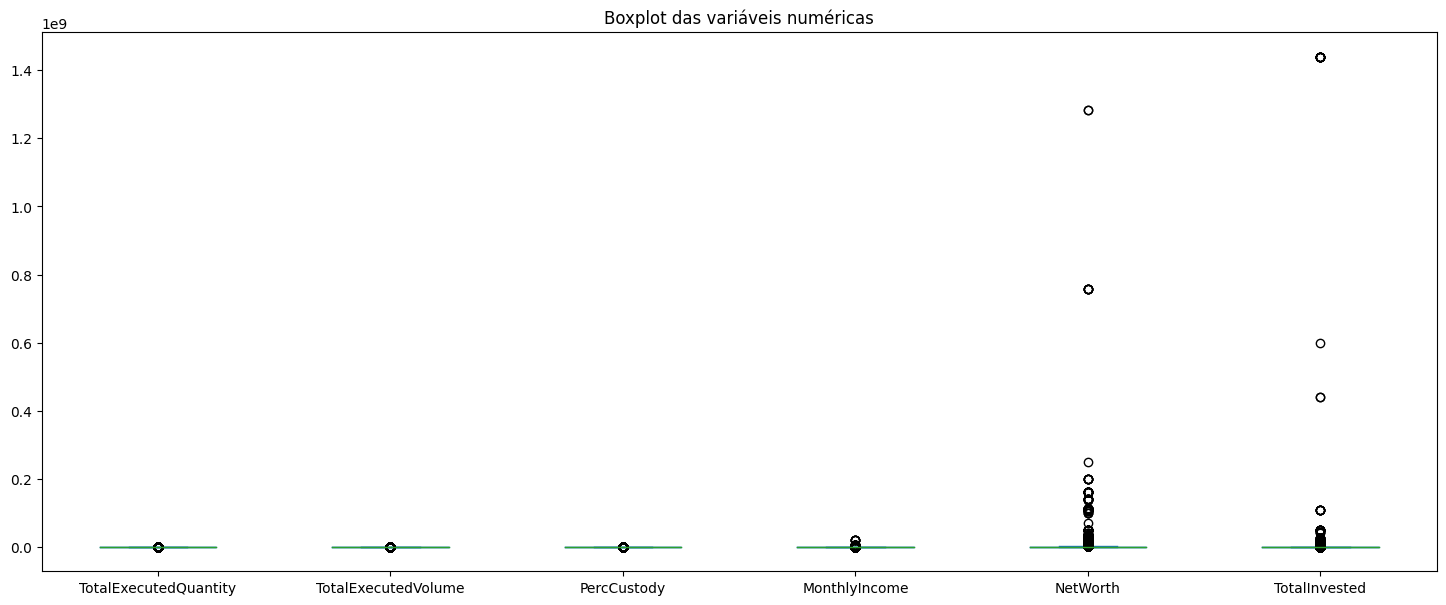

In [38]:
# Boxplot das colunas numéricas

fig = plt.figure()
numeric_cols = df.select_dtypes('number').columns

df[numeric_cols].plot.box(figsize=(18,7))
plt.title('Boxplot das variáveis numéricas')
plt.show()

<Figure size 640x480 with 0 Axes>

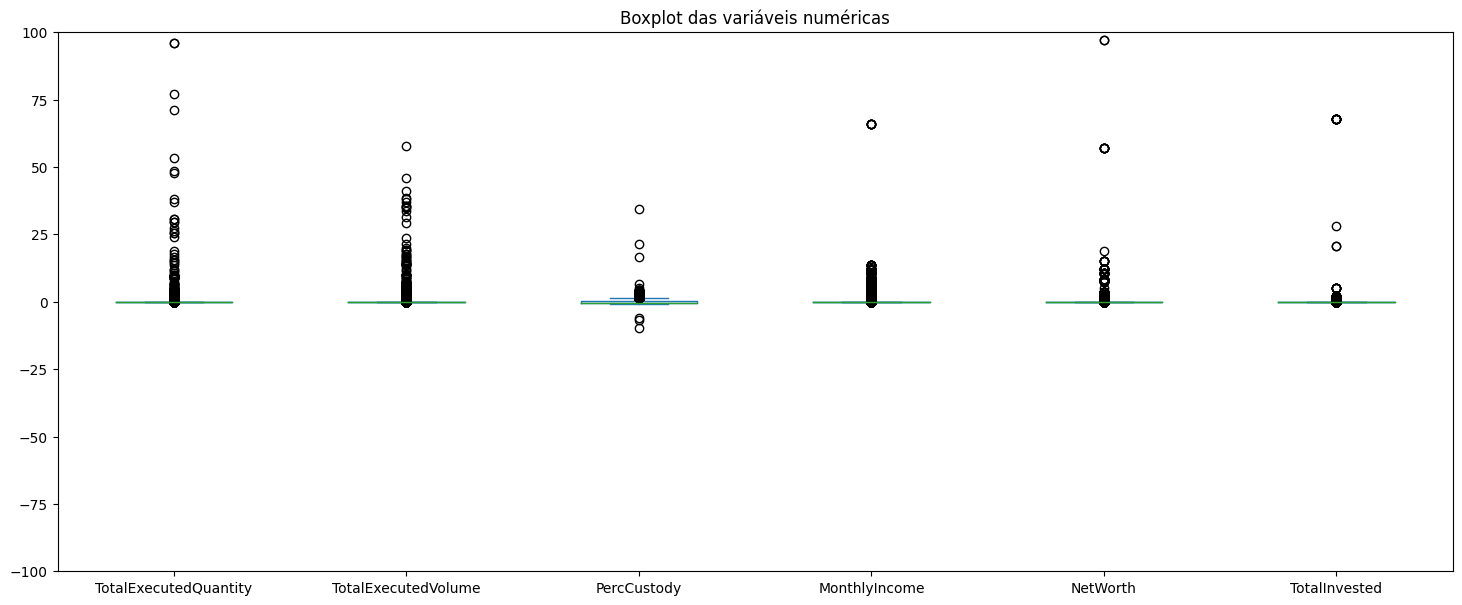

In [39]:
# Boxplot das colunas numéricas normalizadas

fig = plt.figure()
numeric_cols = df.select_dtypes('number').columns

df[numeric_cols].apply(scale).plot.box(figsize=(18,7))
plt.ylim(-100, 100)
plt.title('Boxplot das variáveis numéricas')
plt.show()

In [40]:
# Normalização dos dados

dfNorm = df[numeric_cols].apply(scale)
dfNorm.head()

,TotalExecutedQuantity,TotalExecutedVolume,PercCustody,MonthlyIncome,NetWorth,TotalInvested
0,-0.048514,-0.128759,-0.715116,-0.078630,-0.096254,-0.032857
1,-0.048514,-0.116569,-0.673435,0.040113,0.189586,0.032866
2,-0.038924,-0.107105,-0.132499,-0.085913,-0.093825,-0.032734
3,-0.052846,-0.128029,-0.611014,-0.099212,-0.079007,-0.032122
4,-0.005361,-0.091877,-0.599725,-0.070714,-0.060062,-0.030709


## Outliers

In [41]:
# Quantidade de outliers do dataset

Outliers = []
Outliers.append(df[dfNorm['TotalExecutedQuantity'] > 3.5].count()[0])
Outliers.append(df[dfNorm['TotalExecutedVolume'] > 3].count()[0])
Outliers.append(df[dfNorm['PercCustody'] < -3.5].count()[0] + df[dfNorm['PercCustody'] > 3.5].count()[0])
Outliers.append(df[dfNorm['MonthlyIncome'] > 3.5].count()[0])
Outliers.append(df[dfNorm['NetWorth'] > 3.5].count()[0])
Outliers.append(df[dfNorm['TotalInvested'] > 3.5].count()[0])
np.sum(Outliers)/df.shape[0]*100

1.6010343975204882

In [42]:
# Exclusão dos outliers

df = df.drop(df[dfNorm['TotalExecutedQuantity'] > 3.5].index, axis = 0)
df = df.drop(df[dfNorm['TotalExecutedVolume'] > 3.5].index, axis = 0)
df = df.drop(df[dfNorm['PercCustody'] < -3.5].index, axis = 0)
df = df.drop(df[dfNorm['PercCustody'] > 3.5].index, axis = 0)
df = df.drop(df[dfNorm['MonthlyIncome'] > 3.5].index, axis = 0)
df = df.drop(df[dfNorm['NetWorth'] > 3.5].index, axis = 0)
df = df.drop(df[dfNorm['TotalInvested'] > 3.5].index, axis = 0)

/tmp/ipykernel_6949/2535337940.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df[dfNorm['TotalExecutedVolume'] > 3.5].index, axis = 0)
/tmp/ipykernel_6949/2535337940.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df[dfNorm['PercCustody'] < -3.5].index, axis = 0)
/tmp/ipykernel_6949/2535337940.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df[dfNorm['PercCustody'] > 3.5].index, axis = 0)
/tmp/ipykernel_6949/2535337940.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df[dfNorm['MonthlyIncome'] > 3.5].index, axis = 0)
/tmp/ipykernel_6949/2535337940.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df[dfNorm['NetWorth'] > 3.5].index, axis = 0)
/tmp/ipykernel_6949/2535337940.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame i

In [43]:
lista = ['TotalExecutedQuantity', 'TotalExecutedVolume', 'PercCustody', 'MonthlyIncome', 'NetWorth', 'TotalInvested']

[]

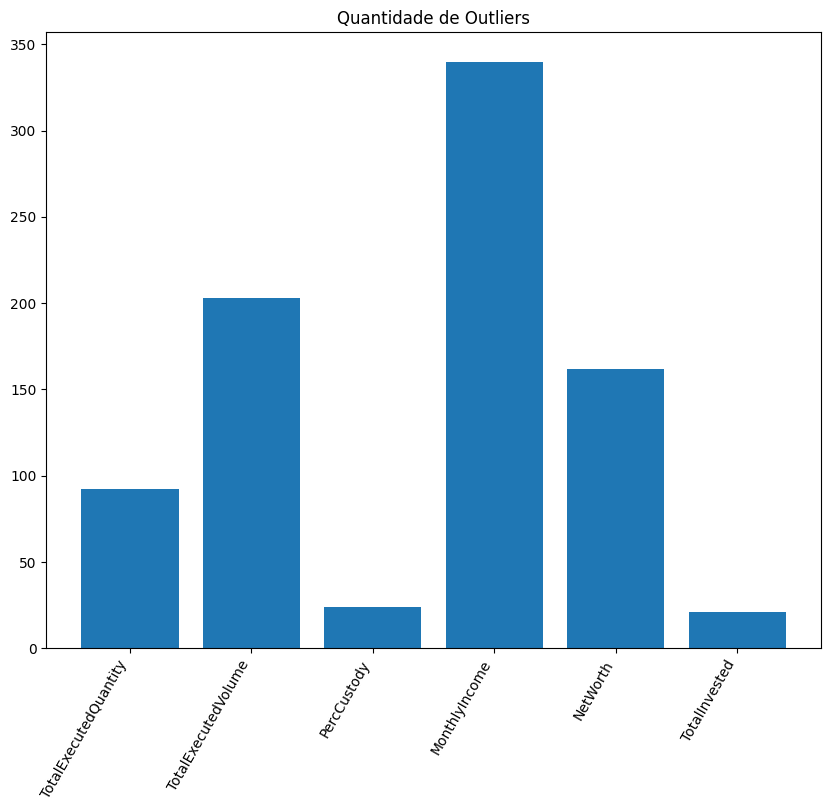

In [44]:
# Quantidade de Outliers por features

fig = plt.figure(figsize=(10, 8))
plt.bar(lista, Outliers)
plt.xticks(rotation=60, ha='right')
plt.title('Quantidade de Outliers')
plt.plot()

## Criação de novas features

### Frequencia de compra por setor

In [47]:
# Frequencia de compra por setor dos produtos

NumSector = pd.DataFrame(df.groupby('AccountID')['Sector'].value_counts())
NumSector = NumSector.rename({'Sector': 'FreqSector'}, axis = 1)
NumSector = NumSector.reset_index(level=['AccountID', 'Sector'])

totalFreq = NumSector.groupby('AccountID')[['FreqSector']].sum()
totalFreq = totalFreq.reset_index().rename({'FreqSector': 'TotalPeriodo'}, axis = 1)
totalFreq

NumSector = NumSector.merge(totalFreq, on = 'AccountID', how = 'left')
NumSector['FrequenciaSetor'] = NumSector['FreqSector']/NumSector['TotalPeriodo']
NumSector = NumSector.query('TotalPeriodo >= 4')
FreqSector = NumSector[['AccountID', 'Sector', 'FrequenciaSetor']]
FreqSector

,AccountID,Sector,FrequenciaSetor
0,++YieSZGfZnQHRV5FF1JNg==,ConsumerNonDurables,0.250000
1,++YieSZGfZnQHRV5FF1JNg==,ConsumerServices,0.250000
2,++YieSZGfZnQHRV5FF1JNg==,ElectronicTechnology,0.250000
3,++YieSZGfZnQHRV5FF1JNg==,RetailTrade,0.250000
7,+/xeN/b1P7d+3IynWGX71g==,ElectronicTechnology,0.277778
...,...,...,...
18644,zyerqNUfQI0zE7sUsGBqnQ==,ElectronicTechnology,1.000000
18645,zyfXUiv0w3F4b8BNm/MdmQ==,TechnologyServices,0.400000
18646,zyfXUiv0w3F4b8BNm/MdmQ==,ConsumerServices,0.200000
18647,zyfXUiv0w3F4b8BNm/MdmQ==,ElectronicTechnology,0.200000


In [48]:
dfSetor = df.copy()
dfSetor = dfSetor.merge(FreqSector, on = ['AccountID', 'Sector'], how = 'left')

In [49]:
dfSetor = dfSetor.dropna()
dfSetor

,AccountID,BuySell,Date,Symbol,ProductCategory,TotalExecutedQuantity,TotalExecutedVolume,PercCustody,MonthlyIncome,NetWorth,...,InvestmentObjective,AvenueRiskProfile,MaritalStatus,PersonMailingState,Geracao,Industry,Product,Product_N3,Sector,FrequenciaSetor
0,1uCUFbHCIkh4gBUBLW0Chg==,B,2022-06-22,EGY,Stocks,1.0000,7.85,0.013131,12500.0,21600.0,...,GROWTH,Perfil Conservador,Single,MG,Geração X,OilAndGasProduction,"VAALCO Energy, Inc.",Stocks,EnergyMinerals,0.541667
1,fz8HbCtcaZEMC2qvHws8OQ==,B,2022-07-28,XYLD,ETF's,1.0000,43.76,0.023596,50000.0,3800000.0,...,GROWTH,Perfil Moderado,Married,BA,Geração X,InvestmentTrustsOrMutualFunds,Global X S&P 500 Covered Call ETF,ETF's,Miscellaneous,0.761905
2,7GALBnOZ54+zM3Zw6tlIWA==,B,2022-01-20,GOOD,Stocks,3.0000,71.64,0.159409,10200.0,53700.0,...,GROWTH,Perfil Conservador,Single,SP,Geração Y,RealEstateInvestmentTrusts,Gladstone Commercial Corp,Stocks,Finance,1.000000
3,cf3UhrDfIXgoKr9vxN3tCA==,B,2022-06-13,AMZN,Stocks,0.0964,10.00,0.039268,6000.0,249580.0,...,GROWTH,Perfil Moderado,Single,SP,Geração Y,InternetRetail,Amazon.com Inc.,Stocks,RetailTrade,0.157895
4,jzfOWrgn2fNHprnBRuCTGw==,B,2022-04-05,SDIV,ETF's,10.0000,116.50,0.042102,15000.0,500000.0,...,GROWTH,Perfil Moderado,Married,SP,Geração X,InvestmentTrustsOrMutualFunds,Global X SuperDividend ETF,ETF's,Miscellaneous,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51933,/ootXTrDkzlOWsB8wewk6Q==,B,2022-01-05,DRIV,ETF's,3.1696,100.00,0.102366,16000.0,270000.0,...,GROWTH,Perfil Conservador,Married,SP,Geração Y,InvestmentTrustsOrMutualFunds,Global X Autonomous & Electric Vehicles ETF,ETF's,Miscellaneous,0.909091
51934,8oMQuXAMPS1T0onOL9c3oA==,B,2022-01-04,TGT,Stocks,0.3435,80.01,0.945377,12000.0,270000.0,...,GROWTH,Perfil Moderado/Agressivo,Single,SP,Geração Y,SpecialtyStores,Target Corp.,Stocks,RetailTrade,0.375000
51935,9apyK7suP9IpF6TOlxiwVA==,B,2022-01-03,NVDA,Stocks,0.0333,10.02,0.075749,3000.0,30000.0,...,GROWTH,Perfil Conservador,Married,RJ,Geração Y,Semiconductors,NVIDIA Corporation,Stocks,ElectronicTechnology,0.384615
51936,DFFcBc492Y8m9wIkURAz4g==,B,2022-01-03,BRK.B,Stocks,0.0266,8.00,0.219787,21792.0,10000.0,...,CAPITAL_PRESERVATION,Perfil Conservador,Single,GO,Geração Y,MultiLineInsurance,Berkshire Hathaway Inc. Hld B,Stocks,Finance,0.133333


### Frequencia de compra por Industria

In [50]:
# Frequencia de compra por industria dos produtos

NumIndustry = pd.DataFrame(df.groupby('AccountID')['Industry'].value_counts())
NumIndustry = NumIndustry.rename({'Industry': 'FreqIndustry'}, axis = 1)
NumIndustry = NumIndustry.reset_index(level=['AccountID', 'Industry'])

totalFreq = NumIndustry.groupby('AccountID')[['FreqIndustry']].sum()
totalFreq = totalFreq.reset_index().rename({'FreqIndustry': 'TotalPeriodo'}, axis = 1)
totalFreq

NumIndustry = NumIndustry.merge(totalFreq, on = 'AccountID', how = 'left')
NumIndustry['FrequenciaIndustria'] = NumIndustry['FreqIndustry']/NumIndustry['TotalPeriodo']
NumIndustry = NumIndustry.query('TotalPeriodo >= 10')
FreqIndustria = NumIndustry[['AccountID', 'Industry', 'FrequenciaIndustria']]
FreqIndustria

,AccountID,Industry,FrequenciaIndustria
8,+/xeN/b1P7d+3IynWGX71g==,InternetRetail,0.166667
9,+/xeN/b1P7d+3IynWGX71g==,MediaConglomerates,0.166667
10,+/xeN/b1P7d+3IynWGX71g==,PharmaceuticalsMajor,0.166667
11,+/xeN/b1P7d+3IynWGX71g==,Semiconductors,0.166667
12,+/xeN/b1P7d+3IynWGX71g==,TelecommunicationsEquipment,0.111111
...,...,...,...
21730,zuaHgwbiChb0fkZNJUGSfA==,TelecommunicationsEquipment,0.076923
21731,zuaHgwbiChb0fkZNJUGSfA==,Unknown,0.076923
21743,zxcJ26rqOOe23IOZa7xCMw==,InvestmentTrustsOrMutualFunds,0.846154
21744,zxcJ26rqOOe23IOZa7xCMw==,InternetSoftwareOrServices,0.153846


In [51]:
dfIndustria = df.copy()
dfIndustria = dfIndustria.merge(FreqIndustria, on = ['AccountID', 'Industry'], how = 'left')

In [52]:
dfIndustria = dfIndustria.dropna()

In [53]:
dfIndustria

,AccountID,BuySell,Date,Symbol,ProductCategory,TotalExecutedQuantity,TotalExecutedVolume,PercCustody,MonthlyIncome,NetWorth,...,InvestmentObjective,AvenueRiskProfile,MaritalStatus,PersonMailingState,Geracao,Industry,Product,Product_N3,Sector,FrequenciaIndustria
0,1uCUFbHCIkh4gBUBLW0Chg==,B,2022-06-22,EGY,Stocks,1.0000,7.85,0.013131,12500.0,21600.0,...,GROWTH,Perfil Conservador,Single,MG,Geração X,OilAndGasProduction,"VAALCO Energy, Inc.",Stocks,EnergyMinerals,0.416667
1,fz8HbCtcaZEMC2qvHws8OQ==,B,2022-07-28,XYLD,ETF's,1.0000,43.76,0.023596,50000.0,3800000.0,...,GROWTH,Perfil Moderado,Married,BA,Geração X,InvestmentTrustsOrMutualFunds,Global X S&P 500 Covered Call ETF,ETF's,Miscellaneous,0.761905
2,7GALBnOZ54+zM3Zw6tlIWA==,B,2022-01-20,GOOD,Stocks,3.0000,71.64,0.159409,10200.0,53700.0,...,GROWTH,Perfil Conservador,Single,SP,Geração Y,RealEstateInvestmentTrusts,Gladstone Commercial Corp,Stocks,Finance,0.842105
3,cf3UhrDfIXgoKr9vxN3tCA==,B,2022-06-13,AMZN,Stocks,0.0964,10.00,0.039268,6000.0,249580.0,...,GROWTH,Perfil Moderado,Single,SP,Geração Y,InternetRetail,Amazon.com Inc.,Stocks,RetailTrade,0.157895
4,jzfOWrgn2fNHprnBRuCTGw==,B,2022-04-05,SDIV,ETF's,10.0000,116.50,0.042102,15000.0,500000.0,...,GROWTH,Perfil Moderado,Married,SP,Geração X,InvestmentTrustsOrMutualFunds,Global X SuperDividend ETF,ETF's,Miscellaneous,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51930,jv8Pon+ul8eAiHRqH2Bx6Q==,B,2022-02-03,VDE,ETF's,43.0000,4014.48,0.075335,50000.0,10000000.0,...,GROWTH,Perfil Moderado/Agressivo,Married,SC,Baby Bloomers,InvestmentTrustsOrMutualFunds,Energy ETF Vanguard,ETF's,Miscellaneous,0.345455
51931,tiwEwl0+7JKVBH4Ec+3Giw==,B,2022-01-24,TSLA,Stocks,0.0111,9.98,0.019209,5000.0,150000.0,...,GROWTH,Perfil Moderado,Partner,SP,Geração X,MotorVehicles,"Tesla, Inc.",Stocks,ConsumerDurables,0.049180
51933,/ootXTrDkzlOWsB8wewk6Q==,B,2022-01-05,DRIV,ETF's,3.1696,100.00,0.102366,16000.0,270000.0,...,GROWTH,Perfil Conservador,Married,SP,Geração Y,InvestmentTrustsOrMutualFunds,Global X Autonomous & Electric Vehicles ETF,ETF's,Miscellaneous,0.909091
51935,9apyK7suP9IpF6TOlxiwVA==,B,2022-01-03,NVDA,Stocks,0.0333,10.02,0.075749,3000.0,30000.0,...,GROWTH,Perfil Conservador,Married,RJ,Geração Y,Semiconductors,NVIDIA Corporation,Stocks,ElectronicTechnology,0.307692


### Frequencia de compra por Produto

In [54]:
# Frequencia de compra por produtos

NumProduto = pd.DataFrame(df.groupby('AccountID')['Symbol'].value_counts())
NumProduto = NumProduto.rename({'Symbol': 'FreqSymbol'}, axis = 1)
NumProduto = NumProduto.reset_index(level=['AccountID', 'Symbol'])

totalFreq = NumProduto.groupby('AccountID')[['FreqSymbol']].sum()
totalFreq = totalFreq.reset_index().rename({'FreqSymbol': 'TotalPeriodo'}, axis = 1)
totalFreq

NumProduto = NumProduto.merge(totalFreq, on = 'AccountID', how = 'left')
NumProduto['FrequenciaSymbol'] = NumProduto['FreqSymbol']/NumProduto['TotalPeriodo']
NumProduto = NumProduto.query('TotalPeriodo >= 3')
FreqIndustria = NumProduto[['AccountID', 'Symbol', 'FrequenciaSymbol']]
FreqIndustria

,AccountID,Symbol,FrequenciaSymbol
0,++YieSZGfZnQHRV5FF1JNg==,AAPL,0.250000
1,++YieSZGfZnQHRV5FF1JNg==,AMZN,0.250000
2,++YieSZGfZnQHRV5FF1JNg==,KO,0.250000
3,++YieSZGfZnQHRV5FF1JNg==,MCD,0.250000
5,+/keI6erhuYMUHcZ1wRj7Q==,BABA,0.333333
...,...,...,...
30338,zyfXUiv0w3F4b8BNm/MdmQ==,AAPL,0.200000
30339,zyfXUiv0w3F4b8BNm/MdmQ==,DIS,0.200000
30340,zyfXUiv0w3F4b8BNm/MdmQ==,NU,0.200000
30341,zyfXUiv0w3F4b8BNm/MdmQ==,VNQ,0.200000


In [55]:
dfProduto = df.copy()
dfProduto = dfProduto.merge(FreqIndustria, on = ['AccountID', 'Symbol'], how = 'left')

In [56]:
dfProduto = dfProduto.dropna()

In [57]:
dfProduto

,AccountID,BuySell,Date,Symbol,ProductCategory,TotalExecutedQuantity,TotalExecutedVolume,PercCustody,MonthlyIncome,NetWorth,...,InvestmentObjective,AvenueRiskProfile,MaritalStatus,PersonMailingState,Geracao,Industry,Product,Product_N3,Sector,FrequenciaSymbol
0,1uCUFbHCIkh4gBUBLW0Chg==,B,2022-06-22,EGY,Stocks,1.0000,7.85,0.013131,12500.0,21600.0,...,GROWTH,Perfil Conservador,Single,MG,Geração X,OilAndGasProduction,"VAALCO Energy, Inc.",Stocks,EnergyMinerals,0.250000
1,fz8HbCtcaZEMC2qvHws8OQ==,B,2022-07-28,XYLD,ETF's,1.0000,43.76,0.023596,50000.0,3800000.0,...,GROWTH,Perfil Moderado,Married,BA,Geração X,InvestmentTrustsOrMutualFunds,Global X S&P 500 Covered Call ETF,ETF's,Miscellaneous,0.476190
2,7GALBnOZ54+zM3Zw6tlIWA==,B,2022-01-20,GOOD,Stocks,3.0000,71.64,0.159409,10200.0,53700.0,...,GROWTH,Perfil Conservador,Single,SP,Geração Y,RealEstateInvestmentTrusts,Gladstone Commercial Corp,Stocks,Finance,0.210526
3,cf3UhrDfIXgoKr9vxN3tCA==,B,2022-06-13,AMZN,Stocks,0.0964,10.00,0.039268,6000.0,249580.0,...,GROWTH,Perfil Moderado,Single,SP,Geração Y,InternetRetail,Amazon.com Inc.,Stocks,RetailTrade,0.157895
4,jzfOWrgn2fNHprnBRuCTGw==,B,2022-04-05,SDIV,ETF's,10.0000,116.50,0.042102,15000.0,500000.0,...,GROWTH,Perfil Moderado,Married,SP,Geração X,InvestmentTrustsOrMutualFunds,Global X SuperDividend ETF,ETF's,Miscellaneous,0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51933,/ootXTrDkzlOWsB8wewk6Q==,B,2022-01-05,DRIV,ETF's,3.1696,100.00,0.102366,16000.0,270000.0,...,GROWTH,Perfil Conservador,Married,SP,Geração Y,InvestmentTrustsOrMutualFunds,Global X Autonomous & Electric Vehicles ETF,ETF's,Miscellaneous,0.090909
51934,8oMQuXAMPS1T0onOL9c3oA==,B,2022-01-04,TGT,Stocks,0.3435,80.01,0.945377,12000.0,270000.0,...,GROWTH,Perfil Moderado/Agressivo,Single,SP,Geração Y,SpecialtyStores,Target Corp.,Stocks,RetailTrade,0.375000
51935,9apyK7suP9IpF6TOlxiwVA==,B,2022-01-03,NVDA,Stocks,0.0333,10.02,0.075749,3000.0,30000.0,...,GROWTH,Perfil Conservador,Married,RJ,Geração Y,Semiconductors,NVIDIA Corporation,Stocks,ElectronicTechnology,0.307692
51936,DFFcBc492Y8m9wIkURAz4g==,B,2022-01-03,BRK.B,Stocks,0.0266,8.00,0.219787,21792.0,10000.0,...,CAPITAL_PRESERVATION,Perfil Conservador,Single,GO,Geração Y,MultiLineInsurance,Berkshire Hathaway Inc. Hld B,Stocks,Finance,0.133333


## Gráficos

(revisar)

## Dumificação de alguns dados categóricos

In [58]:
df_productN3 = pd.get_dummies(df_produtos['Product_N3'])
df_sector = pd.get_dummies(df_produtos['Sector'])
df_industry = pd.get_dummies(df_produtos['Industry'])

In [59]:
df_train = df_productN3.merge(df_sector, left_index=True, right_index=True)
df_train = df_train.merge(df_industry, left_index=True, right_index=True)
df_train

,ETF's,Stocks,Avenue_x,CommercialServices,Communications,ConsumerDurables,ConsumerNonDurables,ConsumerServices,DistributionServices,ElectronicTechnology,...,TelecommunicationsEquipment,Textiles,Tobacco,ToolsAndHardware,Trucking,TrucksOrConstructionOrFarmMachinery,Unknown_y,WaterUtilities,WholesaleDistributors,WirelessTelecommunications
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35060,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35061,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35062,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modeling

## Modelo Content-Based

Contém a implementação de uma recomendação item-item baseada na similaridade de conteúdo. 

**O notebook é dividido em 2 partes**:

1. Representação vetorial com _one-hot-encoding_
2. Representação vetorial com _PCA_

Ambas as partes se utilizam do mesmo pré-processamento.

### Representação vetorial simples

A representação vetorial mais simples que podemos fazer é aquela que consideramos todas as _features_ **sem qualquer redução de dimensionalidade**. No entanto, para realizarmos o cálculo da similaridade, é recomendável que os dados estejam normalizados para que uma _feature_ não tenha maior impacto do que a outra no cálculo da similaridade.

Para fazermos a normalização dos dados, utilizaremos as seguintes classes:

- [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html): escalona as features para o intervalo [0, 1].
- [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html): preenche valores nulos com a média da _feature_.
- [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): agrega todas as transformações em um só objeto.

In [61]:
# Gerar pipeline

pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', MinMaxScaler())
])

pipeline.fit(df_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler())])

In [62]:
def generate_vector_representation(pipeline:Pipeline, preprocessed_data:pd.DataFrame, keep_columns=True):
    df_vectors = pd.DataFrame(pipeline.transform(preprocessed_data))
    if keep_columns:
        df_vectors.columns = preprocessed_data.columns
    df_vectors.index = preprocessed_data.index
    df_vectors.index.name = 'id'
    return df_vectors
df_vectors = generate_vector_representation(pipeline, df_train)
df_vectors.head()

,ETF's,Stocks,Avenue_x,CommercialServices,Communications,ConsumerDurables,ConsumerNonDurables,ConsumerServices,DistributionServices,ElectronicTechnology,...,TelecommunicationsEquipment,Textiles,Tobacco,ToolsAndHardware,Trucking,TrucksOrConstructionOrFarmMachinery,Unknown_y,WaterUtilities,WholesaleDistributors,WirelessTelecommunications
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Calculando a matriz de similaridade item-item

Uma vez obtida a representação vetorial de cada item, podemos calcular a matriz de similaridades a partir de uma função de calcula a similaridade entre 2 vetores. Utilizaremos a **similaridade cosseno** porém outras funções podem ser consultadas na [documentação de métricas pairwise](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise).

In [66]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_similarity_matrix(vectors:pd.DataFrame, similarity_fn=cosine_similarity):
    similarity_matrix = pd.DataFrame(similarity_fn(vectors))
    similarity_matrix.index = vectors.index.astype(str)
    similarity_matrix.index.name = 'id'
    similarity_matrix.columns = vectors.index.astype(str)
    return similarity_matrix

df_item_similarity_matrix = calculate_similarity_matrix(df_vectors)
df_item_similarity_matrix.iloc[:5, :5]

id,0,1,2,3,4
id,,,,,
0,1.000000,0.666667,1.000000,0.666667,0.666667
1,0.666667,1.000000,0.666667,0.666667,0.666667
2,1.000000,0.666667,1.000000,0.666667,0.666667
3,0.666667,0.666667,0.666667,1.000000,1.000000
4,0.666667,0.666667,0.666667,1.000000,1.000000


#### Gerando recomendações

Uma vez obtida a matriz de similaridade item-item, a recomendação pode ser feita obtendo-se os N items mais similares a um _seed_ (ou item-alvo). Portanto, a função `recommend_similar_items()` recebe como parâmetros:

- `similarity_matrix`: matriz com similaridades pre-computadas.
- `target_id`: ID do item-alvo que será a base das recomendações.
- `N`: a quantidade de itens a serem recomendados.

A saída da função é o conjunto de `id`s dos itens recomendados e o `score` de similaridade.

In [68]:
id = 'YI'

def recommend_similar_items(similarity_matrix:pd.DataFrame, target_id:str, n=10):
    target_item_similarities = similarity_matrix.loc[target_id]
    id_similar_items = (
        target_item_similarities
        .sort_values(ascending=False)
        .reset_index()
        .rename({'index': 'id', target_id: 'score'}, axis=1)
    )
    return id_similar_items.head(n).set_index('id')

df_recommended_items = recommend_similar_items(df_item_similarity_matrix, id)
df_recommended_items

KeyError: 'YI'

Para facilitar a análise, agregamos os metadados do catálogo de produtos e ordenamos por `score`.

**Nota 1**: o item-alvo intencionalmente aparecerá em 1o lugar pois a similaridade de um item com ele mesmo será sempre máxima. No entanto, em ambientes de produção este item deve ser filtrado da recomendação.

**Nota 2**: os produtos não são altamente detalhados, por isso temos o score de 1,0 para todos os produtos de mesma industria

In [65]:
def display_recommendations(recommendations:pd.DataFrame, catalog:pd.DataFrame):
    return (
        recommendations
        .merge(catalog, left_index=True, right_index=True, how='inner')
        .sort_values(by='score', ascending=False)
    )

display_recommendations(df_recommended_items, df_produtos)

NameError: name 'df_recommended_items' is not defined